<a href="https://colab.research.google.com/github/vhcaraffini/Classifica-o-de-Baquetas/blob/main/Aula_4_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Fase 1: ETL (Extract, Transform, Load) e Unificação

In [ ]:
df1 = pd.read_csv('/content/baquetas1.csv')
df2 = pd.read_csv('/content/baquetas2.csv')
df3 = pd.read_excel('/content/baquetasprof.xlsx')

df3 = df3.drop(columns=['Model'])

display(df1.head())
display(df2.head())
display(df3.head())

,ID,MODELO,MADEIRA,PONTA,COMPRIMENTO,DIAMETRO (mm),PESO (g)
0,201,7A,Hickory,Nylon,38.6,13.0,43
1,202,7A,Marfin,madeira,40.0,13.5,46
2,203,5B,Hickory,Nylon,40.5,15.0,61
3,204,5B,Hickory,madeira,40.5,15.0,60
4,205,5A,Hickory,madeira,41.3,14.5,44


,NÚMERO,BAQUETA,TAMANHO (CM),TIPO DA MADEIRA,TIPO DA PONTA,DIÂMETRO (MM),PESO (GR)
0,101,7A,39,hickory,nylon,"13,3","1,48"
1,102,7A,40,marfim,madeira,14,"1,62"
2,103,5B,41,hickory,nylon,"14,8","2,12"
3,104,5B,"40,5",hickory,madeira,"15,3","2,22"
4,105,5A,"41,5",hickory,madeira,"14,5","1,55"


,Id,Type,Wood,Tip,Weight (grams),Size (inches),Diameter (mm)
0,301,5A,Hickory,Wood,50 g,"16""",14.4 mm
1,302,5B,Hickory,Wood,54 g,"16""",15.1 mm
2,303,7A,Hickory,Wood,45 g,"15.5""",13.7 mm
3,304,-,Hickory,Wood,59 g,"16""",14.2 mm
4,305,5B,Hickory,Wood,54 g,"16""",15.2 mm


In [ ]:
df2.columns = ['ID', 'MODELO', 'COMPRIMENTO', 'MADEIRA', 'PONTA', 'DIAMETRO (mm)', 'PESO (g)']
df2 = df2[['ID', 'MODELO', 'MADEIRA', 'PONTA', 'COMPRIMENTO', 'DIAMETRO (mm)', 'PESO (g)']]

df3.columns = ['ID', 'MODELO', 'MADEIRA', 'PONTA', 'PESO (g)', 'COMPRIMENTO', 'DIAMETRO (mm)']
df3 = df3[['ID', 'MODELO', 'MADEIRA', 'PONTA', 'COMPRIMENTO', 'DIAMETRO (mm)', 'PESO (g)']]

print(df1.head())
print(df2.head())
print(df3.head())

    ID MODELO  MADEIRA    PONTA  COMPRIMENTO  DIAMETRO (mm)  PESO (g)
0  201     7A  Hickory    Nylon         38.6           13.0        43
1  202     7A   Marfin  madeira         40.0           13.5        46
2  203     5B  Hickory    Nylon         40.5           15.0        61
3  204     5B  Hickory  madeira         40.5           15.0        60
4  205     5A  Hickory  madeira         41.3           14.5        44
    ID MODELO  MADEIRA    PONTA COMPRIMENTO DIAMETRO (mm) PESO (g)
0  101     7A  hickory    nylon          39          13,3     1,48
1  102     7A   marfim  madeira          40            14     1,62
2  103     5B  hickory    nylon          41          14,8     2,12
3  104     5B  hickory  madeira        40,5          15,3     2,22
4  105     5A  hickory  madeira        41,5          14,5     1,55
    ID MODELO  MADEIRA PONTA COMPRIMENTO DIAMETRO (mm) PESO (g)
0  301     5A  Hickory  Wood         16"       14.4 mm     50 g
1  302     5B  Hickory  Wood         16"       15.

In [ ]:
for col in ['COMPRIMENTO', 'DIAMETRO (mm)', 'PESO (g)']:
    df2[col] = df2[col].astype(str).str.replace(',', '.', regex=False)
    df2[col] = pd.to_numeric(df2[col])

df1['MADEIRA'] = df1['MADEIRA'].str.lower()
df2['MADEIRA'] = df2['MADEIRA'].str.lower()
df3['MADEIRA'] = df3['MADEIRA'].str.lower()

df1['PONTA'] = df1['PONTA'].str.lower()
df2['PONTA'] = df2['PONTA'].str.lower()
df3['PONTA'] = df3['PONTA'].str.lower()
df3['PONTA'] = df3['PONTA'].str.replace('wood', 'madeira')
df3['COMPRIMENTO'] = df3['COMPRIMENTO'].str.replace('"', '')
df3['DIAMETRO (mm)'] = df3['DIAMETRO (mm)'].str.replace('mm', '')
df3['PESO (g)'] = df3['PESO (g)'].str.replace('g', '')

for col in ['COMPRIMENTO', 'DIAMETRO (mm)', 'PESO (g)']:
      df3[col] = pd.to_numeric(df3[col])

df3['COMPRIMENTO'] = df3['COMPRIMENTO'] * 2.54

df2['PESO (g)'] = df2['PESO (g)'] * 28.3495

df1['MADEIRA'] = df1['MADEIRA'].str.replace('marfin', 'marfim')

print("D1 type")
print(df1.dtypes)

print("\nD2 type")
print(df2.dtypes)

print("\nD3 type")
print(df3.dtypes)

display(df1.head())
display(df2.head())
display(df3.head())

D1 type
ID                 int64
MODELO            object
MADEIRA           object
PONTA             object
COMPRIMENTO      float64
DIAMETRO (mm)    float64
PESO (g)           int64
dtype: object

D2 type
ID                 int64
MODELO            object
MADEIRA           object
PONTA             object
COMPRIMENTO      float64
DIAMETRO (mm)    float64
PESO (g)         float64
dtype: object

D3 type
ID                 int64
MODELO            object
MADEIRA           object
PONTA             object
COMPRIMENTO      float64
DIAMETRO (mm)    float64
PESO (g)         float64
dtype: object


,ID,MODELO,MADEIRA,PONTA,COMPRIMENTO,DIAMETRO (mm),PESO (g)
0,201,7A,hickory,nylon,38.6,13.0,43
1,202,7A,marfim,madeira,40.0,13.5,46
2,203,5B,hickory,nylon,40.5,15.0,61
3,204,5B,hickory,madeira,40.5,15.0,60
4,205,5A,hickory,madeira,41.3,14.5,44


,ID,MODELO,MADEIRA,PONTA,COMPRIMENTO,DIAMETRO (mm),PESO (g)
0,101,7A,hickory,nylon,39.0,13.3,41.957260
1,102,7A,marfim,madeira,40.0,14.0,45.926190
2,103,5B,hickory,nylon,41.0,14.8,60.100940
3,104,5B,hickory,madeira,40.5,15.3,62.935890
4,105,5A,hickory,madeira,41.5,14.5,43.941725


,ID,MODELO,MADEIRA,PONTA,COMPRIMENTO,DIAMETRO (mm),PESO (g)
0,301,5A,hickory,madeira,40.64,14.4,50.0
1,302,5B,hickory,madeira,40.64,15.1,54.0
2,303,7A,hickory,madeira,39.37,13.7,45.0
3,304,-,hickory,madeira,40.64,14.2,59.0
4,305,5B,hickory,madeira,40.64,15.2,54.0


In [ ]:
merged_df = pd.concat([df1, df2, df3], ignore_index=True)
merged_df = merged_df.reset_index().rename(columns={'index': 'Index'})

print("Head")
display(merged_df.head())

print("\nTail")
display(merged_df.tail())

Head


,Index,ID,MODELO,MADEIRA,PONTA,COMPRIMENTO,DIAMETRO (mm),PESO (g)
0,0,201,7A,hickory,nylon,38.6,13.0,43.0
1,1,202,7A,marfim,madeira,40.0,13.5,46.0
2,2,203,5B,hickory,nylon,40.5,15.0,61.0
3,3,204,5B,hickory,madeira,40.5,15.0,60.0
4,4,205,5A,hickory,madeira,41.3,14.5,44.0



Tail


,Index,ID,MODELO,MADEIRA,PONTA,COMPRIMENTO,DIAMETRO (mm),PESO (g)
65,65,312,5B,hickory,madeira,40.640,15.3,60.0
66,66,313,7A,hickory,madeira,39.370,13.9,48.0
67,67,314,5A,hickory,madeira,41.910,14.4,54.0
68,68,315,5B,hickory,madeira,41.910,15.3,62.0
69,69,316,2B,hickory,madeira,42.164,16.0,62.0


In [ ]:
merged_df['VOLUME'] = np.pi * (merged_df['DIAMETRO (mm)'] / 2)**2 * merged_df['COMPRIMENTO']
merged_df['DENSITY'] = merged_df['VOLUME'] / merged_df['PESO (g)']


print("First few rows of the merged dataframe with the new 'VOLUME' column:")
display(merged_df.head())

First few rows of the merged dataframe with the new 'VOLUME' column:


,Index,ID,MODELO,MADEIRA,PONTA,COMPRIMENTO,DIAMETRO (mm),PESO (g),VOLUME,DENSITY
0,0,201,7A,hickory,nylon,38.6,13.0,43.0,5123.466379,119.150381
1,1,202,7A,marfim,madeira,40.0,13.5,46.0,5725.552611,124.468535
2,2,203,5B,hickory,nylon,40.5,15.0,61.0,7156.940764,117.326898
3,3,204,5B,hickory,madeira,40.5,15.0,60.0,7156.940764,119.282346
4,4,205,5A,hickory,madeira,41.3,14.5,44.0,6819.867507,154.996989


In [ ]:
# Rename the columns
new_column_names = {
    'ID': 'id',
    'MODELO': 'model',
    'MADEIRA': 'wood',
    'PONTA': 'tip',
    'COMPRIMENTO': 'size_inches',
    'DIAMETRO (mm)': 'diameter_mm',
    'PESO (g)': 'weight_g',
    'VOLUME': 'volume',
    'DENSITY': 'density'
}
merged_df = merged_df.rename(columns=new_column_names)

# Reorder the columns
new_column_order = ['id', 'model', 'wood', 'tip', 'size_inches', 'diameter_mm', 'weight_g', 'volume', 'density']
merged_df = merged_df[new_column_order]

print("First few rows of the dataframe with renamed and reordered columns:")
display(merged_df.head())

print("\nColumns after renaming and reordering:")
print(merged_df.columns)

First few rows of the dataframe with renamed and reordered columns:


,id,model,wood,tip,size_inches,diameter_mm,weight_g,volume,density
0,201,7A,hickory,nylon,38.6,13.0,43.0,5123.466379,119.150381
1,202,7A,marfim,madeira,40.0,13.5,46.0,5725.552611,124.468535
2,203,5B,hickory,nylon,40.5,15.0,61.0,7156.940764,117.326898
3,204,5B,hickory,madeira,40.5,15.0,60.0,7156.940764,119.282346
4,205,5A,hickory,madeira,41.3,14.5,44.0,6819.867507,154.996989



Columns after renaming and reordering:
Index(['id', 'model', 'wood', 'tip', 'size_inches', 'diameter_mm', 'weight_g',
       'volume', 'density'],
      dtype='object')


In [ ]:
# Export the merged dataframe to a CSV file
merged_df.to_csv('drumsticks_dataset.csv', index=False)

## Fase 2: Análise Exploratória de Dados (EDA)

In [ ]:
drumstick_df = pd.read_csv('/content/drumsticks_dataset.csv')

drumstick_df = drumstick_df.dropna()

drumstick_df = drumstick_df[~(drumstick_df == '-').any(axis=1)]

drumstick_df.info()
drumstick_df.describe()
display(drumstick_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 69
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           41 non-null     int64  
 1   model        41 non-null     object 
 2   wood         41 non-null     object 
 3   tip          41 non-null     object 
 4   size_inches  41 non-null     float64
 5   diameter_mm  41 non-null     float64
 6   weight_g     41 non-null     float64
 7   volume       41 non-null     float64
 8   density      41 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.2+ KB


,id,model,wood,tip,size_inches,diameter_mm,weight_g,volume,density
0,201,7A,hickory,nylon,38.6,13.0,43.0,5123.466379,119.150381
1,202,7A,marfim,madeira,40.0,13.5,46.0,5725.552611,124.468535
2,203,5B,hickory,nylon,40.5,15.0,61.0,7156.940764,117.326898
3,204,5B,hickory,madeira,40.5,15.0,60.0,7156.940764,119.282346
4,205,5A,hickory,madeira,41.3,14.5,44.0,6819.867507,154.996989


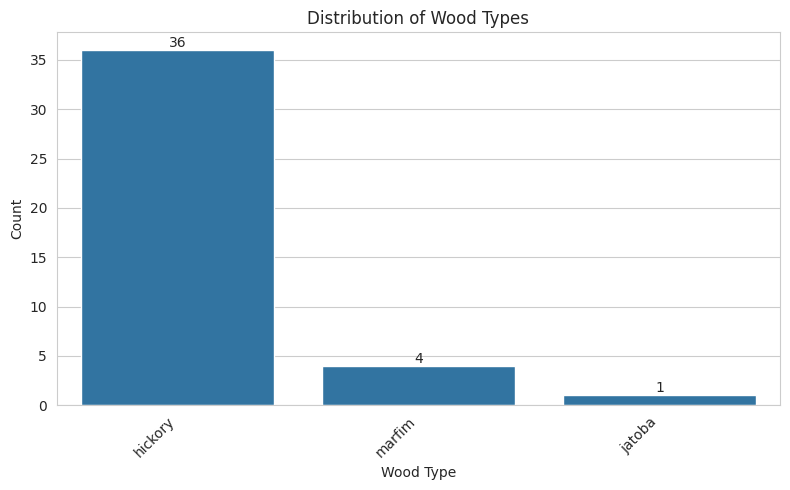

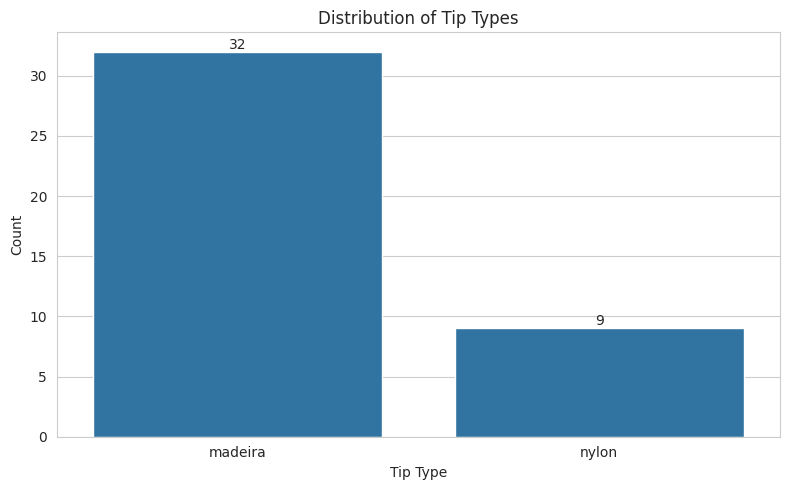

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Plot distribution of 'wood'
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=drumstick_df, x='wood', order=drumstick_df['wood'].value_counts().index)
plt.title('Distribution of Wood Types')
plt.xlabel('Wood Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Plot distribution of 'tip'
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=drumstick_df, x='tip', order=drumstick_df['tip'].value_counts().index)
plt.title('Distribution of Tip Types')
plt.xlabel('Tip Type')
plt.ylabel('Count')
plt.tight_layout()
# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

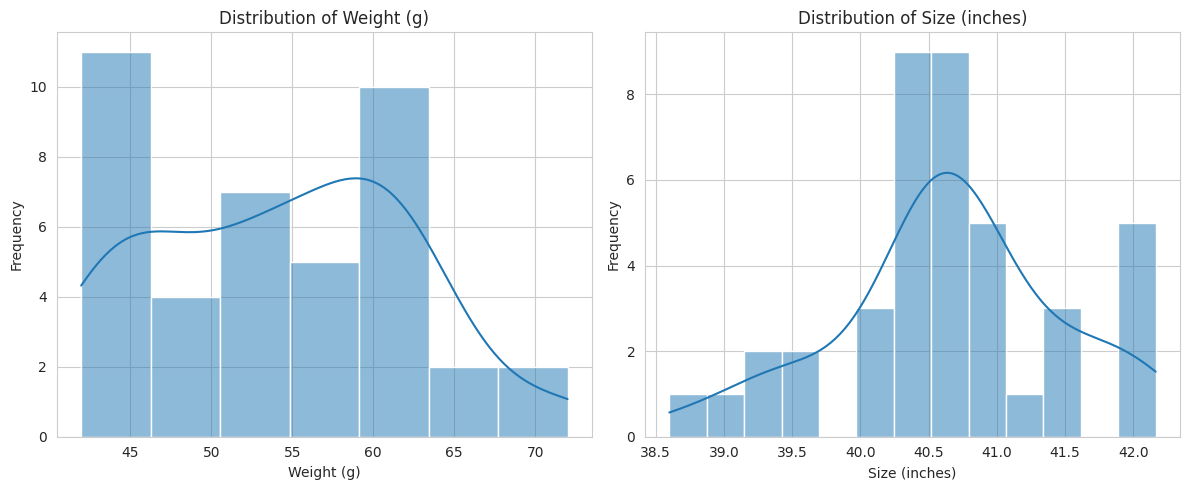

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Plot histograms for 'weight_g' and 'size_inches'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=drumstick_df, x='weight_g', kde=True)
plt.title('Distribution of Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=drumstick_df, x='size_inches', kde=True)
plt.title('Distribution of Size (inches)')
plt.xlabel('Size (inches)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

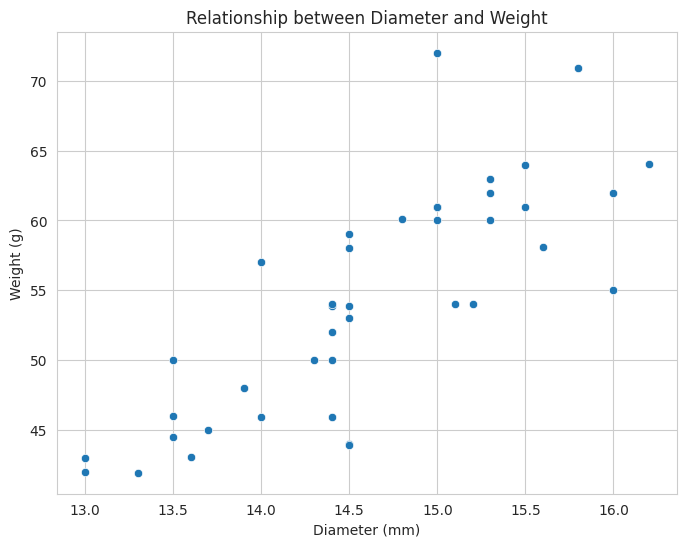

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Plot scatter plot for 'diameter_mm' vs 'weight_g'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=drumstick_df, x='diameter_mm', y='weight_g')
plt.title('Relationship between Diameter and Weight')
plt.xlabel('Diameter (mm)')
plt.ylabel('Weight (g)')
plt.show()

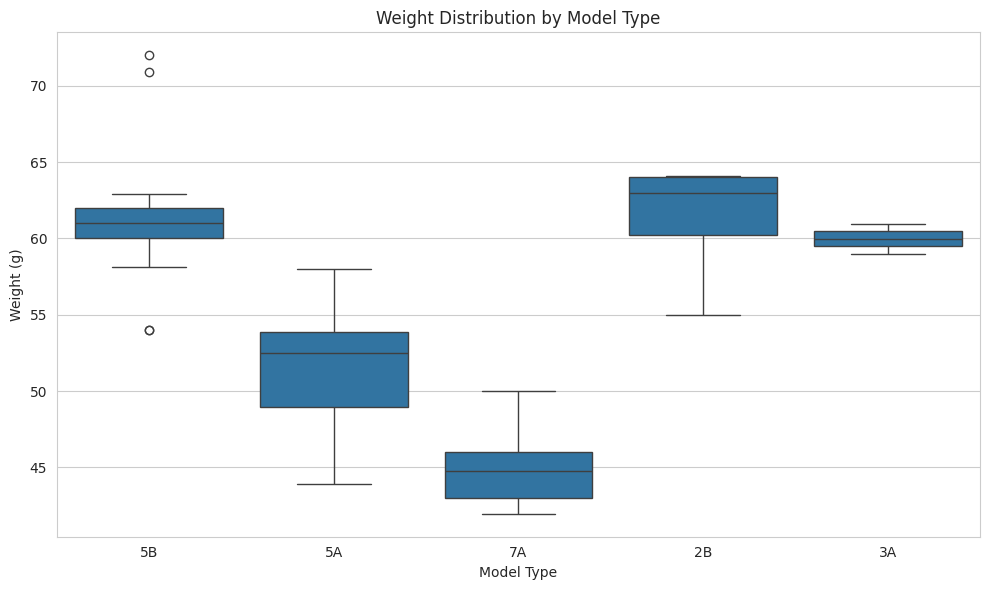

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Plot box plot for 'weight_g' by 'model'
plt.figure(figsize=(10, 6))
sns.boxplot(data=drumstick_df, x='model', y='weight_g', order=drumstick_df['model'].value_counts().index)
plt.title('Weight Distribution by Model Type')
plt.xlabel('Model Type')
plt.ylabel('Weight (g)')
plt.tight_layout()
plt.show()

## Fase 3: Pré-processamento para Modelagem